<a href="https://colab.research.google.com/github/AlvinChiew/MachineLearning/blob/main/Sklearn_Classifier_Ensemble_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split as split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from scipy import ndimage

# Functions

In [2]:
def plot_boundary(classifier, X, ax):
    eps          = X.std()/2
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx           = np.linspace(x_min, x_max, 1000)
    yy           = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    C_grid = classifier.predict(X_grid)
    C_grid = C_grid.reshape(X1.shape)
    ax.contourf(X1, X2,C_grid, alpha=0.2)
    ax.set_xlim(x_min, x_max);    ax.set_xticks(()) 
    ax.set_ylim(y_min, y_max);    ax.set_yticks(())

    ax.scatter(X[:,0], X[:,1], c=y,s=20, cmap=plt.get_cmap('viridis'))

In [3]:
def plot_tree_partition(X, y, tree, ax=None):
    eps          = X.std()/2
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx     = np.linspace(x_min, x_max, 1000)
    yy     = np.linspace(y_min, y_max, 1000)
    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]

    Z      = tree.predict(X_grid)
    Z      = Z.reshape(X1.shape)
    faces  = tree.apply(X_grid)
    faces  = faces.reshape(X1.shape)
    border = ndimage.laplace(faces) != 0
    
    ax.contourf(X1, X2, Z, alpha=.4, levels=[0, .5, 1])
    ax.scatter(X[:,0], X[:,1], c=y,s=20, cmap=plt.get_cmap('viridis'))
    ax.plot(X1[border], X2[border], 'k,')

    ax.set_xlim(x_min, x_max);    ax.set_xticks(()) 
    ax.set_ylim(y_min, y_max);    ax.set_yticks(())
    return ax

# Load Data & Pre-Process

In [9]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = split(X, y, stratify=y, random_state=0)

# Train Model

In [10]:
model = RandomForestClassifier(n_estimators=25, random_state=2)     # 25 tress involved
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

# Evaluation

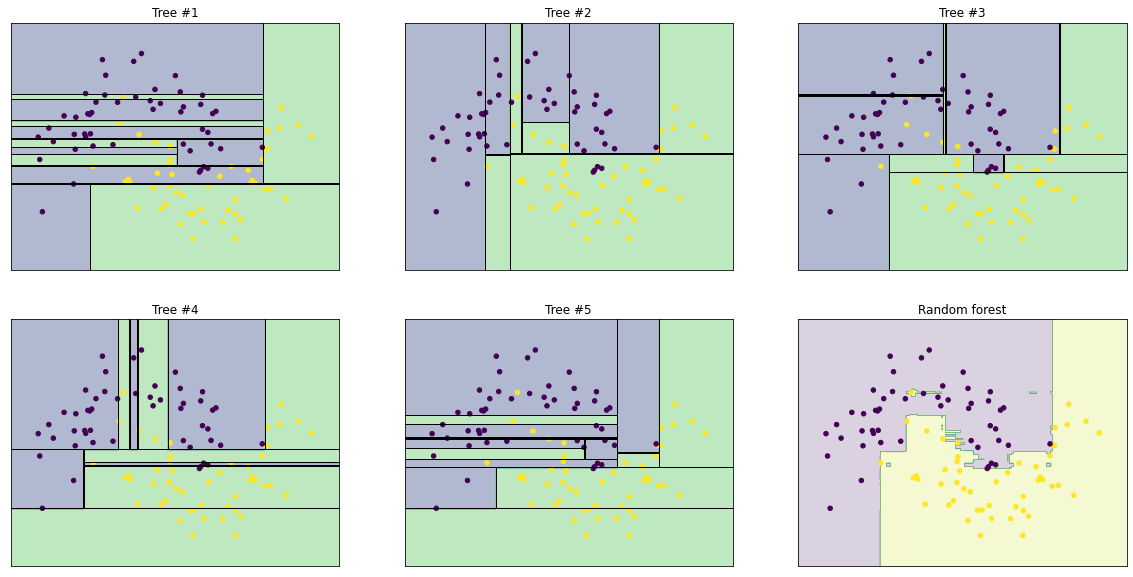

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate( zip( axes.ravel()[:-1], model.estimators_)):    # Draw result from first 5 trees 
    plot_tree_partition(X,y, tree, ax)
    ax.set_title('Tree #%d'%(i+1))

plot_boundary( model, X, axes.ravel()[-1])      # draw averaged result from the forest of 25 trees
axes.ravel()[-1].set_title('Random forest')
plt.show()

# Seem like result from random forest is a little overfitted to yellow outliers.

In [12]:
# Random Forest in average
print(f'Train score : {model.score(X_train, y_train)}')
print(f'Test score : {model.score(X_test, y_test)}')

Train score : 1.0
Test score : 0.96


In [18]:
for i,tree in zip(range(len(model.estimators_)), model.estimators_):
    print(f'Tree #{i+1}')
    print(f'Train score : {tree.score(X_train, y_train)}')
    print(f'Test score : {tree.score(X_test, y_test)}')

Tree #1
Train score : 0.8133333333333334
Test score : 0.76
Tree #2
Train score : 0.9466666666666667
Test score : 0.92
Tree #3
Train score : 0.92
Test score : 0.96
Tree #4
Train score : 0.92
Test score : 0.84
Tree #5
Train score : 0.9333333333333333
Test score : 0.84
Tree #6
Train score : 0.92
Test score : 0.84
Tree #7
Train score : 0.92
Test score : 0.84
Tree #8
Train score : 0.9466666666666667
Test score : 0.88
Tree #9
Train score : 0.9333333333333333
Test score : 0.96
Tree #10
Train score : 0.8933333333333333
Test score : 0.68
Tree #11
Train score : 0.88
Test score : 0.6
Tree #12
Train score : 0.8933333333333333
Test score : 0.48
Tree #13
Train score : 0.9333333333333333
Test score : 0.8
Tree #14
Train score : 0.9066666666666666
Test score : 0.76
Tree #15
Train score : 0.9066666666666666
Test score : 0.96
Tree #16
Train score : 0.9733333333333334
Test score : 0.92
Tree #17
Train score : 0.8933333333333333
Test score : 0.8
Tree #18
Train score : 0.9066666666666666
Test score : 0.8
Tre